<h1><center>INF285 - Computación Científica </center></h1>
<h1><center>Tarea 2</center></h1>
<h3><center>Claudia Hazard Valdés  <br> <br/> claudia.hazard.14@sansano.usm.cl <br><br/>              201404523-9</center></h3>  _Marzo 2017_

* [1.- Introducción](#Intro)
* [2.- Desarrollo y análisis de resultados](#Des)
    * [Aritmética Punto Flotante](#aritmetica)
    * [Pérdida de Significancia](#perdida)
* [5.- Conclusiones](#con)
* [5.- Referencias](#ref)

<div id='Intro' />
<h2>1. Introducción</h2>

Se han realizado diversos ejercicios relacionados con aritmética y punto flotante a traves de Ipython. Se han analizado y mostrado utilizando las librerias Numpy, Scipy, Sympy, Matplotlib y ipywidgets teniendo en cuenta los numeros standard IEEE 754 floating points y el metodo de redondeo de estos.

<div id='Des' />
<h2>2. Desarrollo y análisis de resultados.</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bitstring as bs
%matplotlib inline

<div id='aritmetica' />
          <h2> -  Aritmética de Punto Flotante </h2>


<p style="font-size: 15px; line-height: 135%;}"> El estándar IEEE consiste en un set de representaciones binarias de numeros reales, en donde la precisión denominada <i> double precision</i> se estructuran de la siguiente forma: el <b>signo</b> ( + o - ) que ocupa 1 bit, una <b>mantisa</b> $b$ , que contiene un string the bits significantes, usando un total de 52 bits y el <b>exponente</b> $p$, que ocupa 11 bits. La representación normalizada de los números de punto flotante es la siguiente:

$$ \pm1.bbb...b \times 2^p$$


<p style="font-size: 15px; line-height: 135%;}">a)  Defina que corresponde el valor de <b>machine epsilon</b> $\epsilon_{mach}$ y explique porqué es posible obtener dicho valor en una computadora IEEE de doble precisión calculando el valor de la siguiente resta:</p>

$$\left(\frac{7.0}{3.0} - \frac{4.0}{3.0}\right) - 1.0 $$

<p style="font-size: 15px; line-height: 135%;}"> Implemente la resta usando variables de doble precisión y describa el procedimiento usando aritmética de doble precisión y Nearest Rounding Rule </p>



El valor machine epsilon $\epsilon_{mach}$ corresponde a la diferencia que existe entre el numero 1 y el siguiente valor representable en una computadora IEEE de doble, este corresponde a $1+2^{-52}$.

Por lo tanto  $\epsilon_{mach} =  1+2^{-52} - 1$ , $\epsilon_{mach} = (2^{-52})_{2}$ numero que en decimal correponde a $\approx 2 \ x \ 10^{-16}$.


In [2]:
print((7.0/3.0 - 4.0/3.0 ) - 1.0)

2.220446049250313e-16


El valor obtenido corresponde a $\epsilon_{mach}$ ya que la computadora realiza primero las divisiones y luego las restas, entonces esta redondea dichas divisiones, de esta forma el error de calculo dependerá de $\epsilon_{mach}$ y al deber dar 0 entrega el maximo error de presición posible.

En cambio si se realiza primero la resta y luego la división el resultado es bastante distinto:

In [3]:
print(((7.0- 4.0)/3.0)  - 1.0)

0.0


 $\\$

In [5]:
def to_binary(f):
    b = bs.pack('>d', f)
    b = b.bin
    #show sign + exponent + mantisa
    return b[0]+' '+b[1:12]+ ' '+b[12:]

Se tendrán los valores $ \frac{7.0}{3.0} \equiv 2.\overline{3}$ y $\frac{4.0}{3.0} \equiv 1.\overline{3} $

In [6]:
print ("El valor 7.0/3.0 = ",)
print (to_binary(7.0/3.0))
print ("El valor 4.0/3.0 = ",)
print(to_binary(4.0/3.0))

El valor 7.0/3.0 = 
0 10000000000 0010101010101010101010101010101010101010101010101011
El valor 4.0/3.0 = 
0 01111111111 0101010101010101010101010101010101010101010101010101


¿Como es que se llega a estos valores?

Para $2.\overline{3}$:

In [7]:
print ("El valor 2.333333333333333 = ",)
print (to_binary(2.333333333333333))
print ("El valor 2.3333333333333333 = ",)
print(to_binary(2.3333333333333333))

El valor 2.333333333333333 = 
0 10000000000 0010101010101010101010101010101010101010101010101010
El valor 2.3333333333333333 = 
0 10000000000 0010101010101010101010101010101010101010101010101011


Se puede ver que el valor de $2.\overline{3}$ ha sido redondeado hacia arriba, aplicando Nearest Rounding Rule:


0  $ \\$  10000000000  $\\$    0010101010101010101010101010101010101010101010101010  $\\$   1010101010

Como el digito que se encuentra en $2^{-53}$ es 1 y no todos los valores a su derecha son 0, se debe redondear hacia arriba.



Se crea la funcion NRR que calcula el Nearest Rounding Rule:

In [8]:
#Función que suma 1 a un numero expresado en IEEE.
def suma1(num):
    for x in range(len(num)):
        if bin(int(num[(len(num)-1-x)],2)+1)[2:]=='1':
            return num[:(len(num)-1-x)]+'1'+num[(len(num)-x):]
        else:
            num=num[:(len(num)-1-x)]+'0'+num[(len(num)-x):]

In [9]:
#Función que calcula si los numeros a la derecha son todos 0.
def sumadig(a):
    s=0
    for x in a:
        s+=int(x)
    return s  

In [10]:
#Función que realiza la regla de redondeo al numero mas cercano.
def NRR(mant):
    # Si la mantissa no exede los 52 espacios de almacenamiento, se retorna el mismo numero.
    if len(mant)==52:
        return mant[:52]
    # Si el valor numero 53 es 0, se redondea hacia abajo.
    elif mant[52]=='0':
        return mant[:52]
    #Si el valor numero 53 es un 1 y todos los valores a su derecha son 0 se aproxima hacia abajo. 
    elif sumadig(mant[52:])==1:
        return mant[:52]
    #Sino se suma 1 (Aproxima hacia arriba.)
    else:
        return suma1(mant[:52])

In [11]:
print('El valor de la mantissa de 2.33333... utilizando el redondeo es:')
print (NRR('001010101010101010101010101010101010101010101010101010101'))

El valor de la mantissa de 2.33333... utilizando el redondeo es:
0010101010101010101010101010101010101010101010101011


In [12]:
print('El valor de la mantissa de 1.33333... utilizando el redondeo es:')
print (NRR('0101010101010101010101010101010101010101010101010101010101'))

El valor de la mantissa de 1.33333... utilizando el redondeo es:
0101010101010101010101010101010101010101010101010101


Por lo tanto el valor $2.\overline{3} $ es aproximado hacia arriba mientras que $1.\overline{3}$ es aproximado hacia abajo.

Luego al realizar la resta:

In [13]:
print (to_binary((7.0/3.0)-(4.0/3.0)))

0 01111111111 0000000000000000000000000000000000000000000000000001


Esta queda con un error de $(2^{-52})_{2}$ 
Finalmente se resta con 1 quedando simplemente el valor de $\epsilon_{mach}$

In [14]:
print (to_binary(((7.0/3.0)-(4.0/3.0))-1))

0 01111001011 0000000000000000000000000000000000000000000000000000


<p style="font-size: 18px; line-height: 135%;}"> b) Considere la serie geométrica:</p>

$$\sum_{i=0}^{\infty} r^i = \frac{1}{1-r}$$ 

<p style="font-size: 18px; line-height: 135%;}"> 
para $|r|<1$. Ahora considere el siguiente código.</p>

In [15]:
# Suma parcial de serie geométrica.
# Esta función realiza una suma parcial de la serie geométrica con M terminos, 
# pero detecta si es que los terminos que se están agregando aportan o no al
# resultado final. En caso de que los terminos ya no aporten, se detiene el loop
# y se retorna el valor obtenido y el índice en que se detuvo el loop.

def my_partial_geometric_series(r,M):
    sum_final=1.0
    sum_before=sum_final
    final_index=-1
    for i in np.arange(1,M):
        sum_before +=r**i
        if sum_final==sum_before:
            final_index=i-1
            break
        else:
            sum_final=sum_before
    # Se retorna el valor obtenido de la suma parcial y cuando se truncó
    # dado que no aportaba.
    return np.array([sum_final,final_index])

<p style="font-size: 18px; line-height: 135%;}"> Ahora para distintos valores de $r$ se han obtenido el número de terminos que efectivamente aportan al resultado final dado que se está utilizando _double precision_.</p>

In [18]:
N = 20
M = 1e8
r_all = np.logspace(-1,-20,N)
out_data = np.zeros((N,2))
for i in np.arange(N):
    out_data[i,:]=my_partial_geometric_series(r_all[i],M)


<p style="font-size: 18px; line-height: 135%;}">  Graficando la candidad de terminos significativos en _double precision_ versus el $r$. </p>

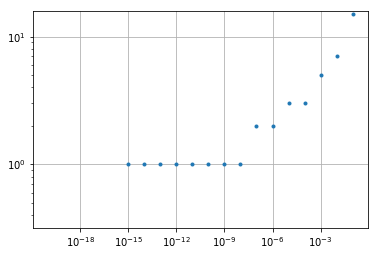

In [17]:
plt.figure()
plt.loglog(r_all,out_data[:,1],'.')
plt.grid(True)
plt.ylim([10**(-0.5),np.max(out_data[:,1])+1])
plt.show()

<p style="font-size: 18px; line-height: 135%;}">  Explique cláramente por qué a medida que disminuye $r$ disminuye la cantidad de terminos significativos obtenidos. </p>


Mientras menor es el valor de r el valor obtenido se acerca mas al limite posible de representación en el sistema de aritmética de doble presición, es decir, que mientras menor sea el valor de r menos significancia tendrá hasta llegar al punto que se vuelva 0 en el computador.

Por lo que se debe cumplir:

$$\frac{| fl(x) - x |}{|x|} <= \frac{1}{2 \ \epsilon_{mach} }$$

Despejando:

$$\epsilon_{mach} <= \frac{|x|}{2| fl(x) - x |}$$

Por lo tanto los valores deben ser mayores que $\epsilon_{mach}$ o no podrán ser representados.

<p style="font-size: 18px; line-height: 135%;}"> c) Explique la razón de por qué el loop indicado debe ejecutar el break. Utilice la función "to_binary" incluida en el jupyter notebook "03_floating_point_arithmetic" para entregar su justificación. Obtenga el menor valor de $X$ que ejecuta el break. </p>

In [ ]:
X=2**53
a=X+0.0
b=X+1.0
while(True):
    a+=1.0
    b+=1.0
    if a == b:
        print('They are equal! Why?')
        break

Tomando el numero $2^{53}$ será el menor valor, ya que el computador puede guardar hasta $2^{52}$ por lo que X toma un valor tan grande que debe correr el 1 hacia la derecha tantas veces que el 1 no puede ser guardado y por esto llega a ser despreciado por el computador.

Graficamente se puede ver de la siguiente forma:

In [39]:
print('2^53 =')
to_binary(2**1023) # que corresponde a el mayor numero representable en el sistema de doble presición.

2^53 :


'0 11111111110 0000000000000000000000000000000000000000000000000000'

In [41]:
print('2^53 + 1 =')
to_binary(2**1023+1)

2^53 + 1 =


'0 11111111110 0000000000000000000000000000000000000000000000000000'

Por lo que al sumar 1 no existe espacio para ser representado por el computador, excede el maximo de almacenamiento y tanto a como b son iguales.

<div id='perdida' />
<h2> -  Pérdida de Significancia </h2>

<p style="font-size: 15px; line-height: 135%;}">La <b>Pérdida de Significancia </b> ocurre cuando en un cálculo numérico muchos dígitos relevantes se cancelan, dada la aritmética de punto flotante finita ocupada por los computadores. Cuando un número es restado por otro número considerablemente parecido, efectos indeseados ocurren tales como la cancelación  y reducción de dígitos.  </p>

<p style="font-size: 18px" > 1. Dada la función: </p>

$$f(x) = \frac{1 - x}{ 1 + x} - \frac{1}{3x+1}$$

<p>a) Grafique la función usando $x \in {[-10,10]}$ ¿Para que valores de x la función queda reducida a $0$ ?</p>
<p>b) Usando $x = [10^{-1} , 10^{-2} , ... , 10^{-20}] $ , calcule los valores de f(x) ¿Que ocurre con los valores observados? ¿En que momento ocurre pérdida de significancia? Describa el origen de cancelación de digítos. </p>  
<p>c) Reescriba la función original para evitar el proceso de pérdida de significancia (hint: busqué un denominador común para ambas fracciones.) </p> 
<p> d) Analice la diferencia entre los resultados de la función $f(x)$ con la función reescrita en la pregunta anterior. Realice un gráfico que mida la diferencia entre los resultados del punto a) y c). Realice un análisis cualitativo y cuantitativo de los resultados.

a)

Se grafica la función en su dominio

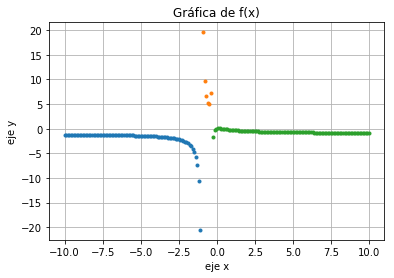

In [49]:
def f(x):
    return ((1-x)/(1+x)) - (1/(3*x + 1)) 
x=np.arange(-10,10,0.1)
x1=np.arange(-10.0 , -1, 0.1)
x2=np.arange(-1+0.1,-1/3,0.1)
x3=np.arange(-1/3 + 0.1, 10,0.1)
plt.plot(x1, f(x1),'.',x2,f(x2),'.',x3,f(x3),'.')
plt.xlabel('eje x')
plt.ylabel('eje y')
plt.title('Gráfica de f(x)')
plt.grid()
plt.show()

El intervalo se hace 0 para casi todos los valores de x menos los cercanos a -1.

b)

In [45]:
for x in range(21)[1:]:
    print (f(10**(-x)))
    

0.04895104895104896
0.009324233394213177
0.0009930249212402043
9.99300249920898e-05
9.999300024987612e-06
9.99992999961563e-07
9.999992989229156e-08
9.999999384113778e-09
9.999999717180685e-10
1.000000082740371e-10
1.000000082740371e-11
9.999778782798785e-13
1.000310945187266e-13
9.992007221626409e-15
9.992007221626409e-16
1.1102230246251565e-16
0.0
0.0
0.0
0.0


Se puede observar que a medida que el x tiende a 0 el numero se vuelve menor hasta el exponente -16, luego se el valor de la función se vuelve 0.

La perdida de significancia ocurre en $10^{-17}$, esto ocurre ya que el computador utiliza doble presición y al superar $\epsilon_{mach}$ que corresponde a $\approx 2 \ x \ 10^{-16}$ no puede seguir guardando dichos valores.  

c)


Una forma de reescribir la ecuación es:

$$f(x) = \frac{1}{ 1 + x} - \frac{x}{ 1 + x} - \frac{1}{3x+1}$$

De la que se puede llegar a :

$$n(x) = \frac{x(3x - 1)}{ (1 + x) (3x + 1) }$$

In [46]:
def n(x):
    return (x*(3*x-1))/((1+x)*(3*x+1))

d)

Con la nueva función n(x) se obtienen los siguientes valores:

In [47]:
for x in range(21)[1:]:
    print (n(10**-x))

-0.04895104895104894
-0.009324233394213208
-0.0009930249212402754
-9.993002499210242e-05
-9.999300024999211e-06
-9.999930000250002e-07
-9.999993000002501e-08
-9.999999300000026e-09
-9.999999929999998e-10
-9.999999993e-11
-9.9999999993e-12
-9.999999999929996e-13
-9.999999999993002e-14
-9.999999999999301e-15
-9.99999999999993e-16
-9.999999999999994e-17
-1e-17
-1e-18
-1e-19
-1e-20


Se realiza una gráfica de ambas funciones en todo el intervalo.

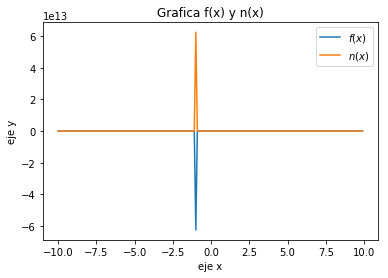

In [53]:
plt.plot(x, f(x),label='$ f(x)$')
plt.plot(x, n(x),label='$n(x)$')
plt.xlabel('eje x')
plt.ylabel('eje y')
plt.title('Grafica f(x) y n(x)')
plt.legend(loc='upper right')
plt.show()

Luego se gráfica para el dominio de la función.

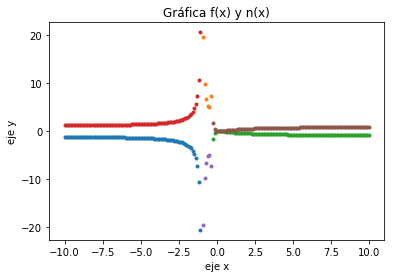

In [54]:
plt.plot(x1, f(x1),'.',x2,f(x2),'.',x3,f(x3),'.')
plt.plot(x1, n(x1),'.',x2,n(x2),'.',x3,n(x3),'.')
plt.xlabel('eje x')
plt.ylabel('eje y')
plt.title('Gráfica f(x) y n(x)')
plt.show()

Se calcula la diferencia entre los valores obtenidos y se grafica.

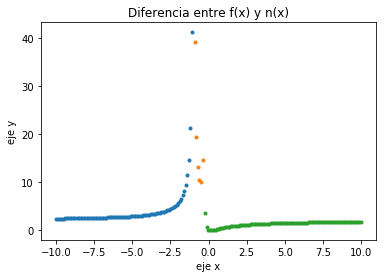

In [56]:
plt.plot(x1, abs(f(x1)-n(x1)),'.',x2,abs(f(x2)-n(x2)),'.',x3,abs(f(x3)-n(x3)),'.')
plt.xlabel('eje x')
plt.ylabel('eje y')
plt.title('Diferencia entre f(x) y n(x)')
plt.show()

A pesar de que (x) es la misma función que f(x), n(x) es procesada de manera distinta(dejando la división para el final), esto genera que no sea necesario aproximar tantos resultados.

Tambien se puede ver que ambas funciones al acercarse a -1 osilan entre valores positivos y negativos y que la diferencia de los valores entre las funciones tiende a positivo.

<p style="font-size: 18px" > 2. Para la siguiente función: </p>

$$g(x) = \frac{1 - \sec(x)}{\tan(x)^2} $$

<p>a) Usando $x = [-2\pi, 2\pi ]$ observe el comportamiento de la función. </p>

<p>b) Usando el intervalo $x = [-2\pi, 2\pi ] $ , calcule los valores de f(x) ¿Que ocurre con los valores observados? ¿En que momento ocurre pérdida de significancia? Describa el origen de cancelación de digítos. </p> 
<p>c) Reescriba la función original para evitar el proceso de pérdida de significancia (hint: implemente propiedades trigonométricas). </p> 
<p> d) Analice la diferencia entre los resultados de la función $g(x)$ con la función reescrita en la pregunta anterior. Realice un gráfico que mida la diferencia entre los resultados del punto a) y c). Realice un análisis cualitativo y cuantitativo de los resultados.

a)

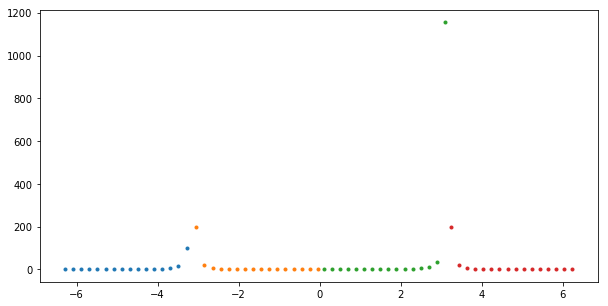

In [5]:
import numpy as np
from sympy import cos, sec
import matplotlib.pyplot as plt

x=np.arange(-2 * np.pi, 2* np.pi , 0.2)

def  g(x):
     return (1 - (1/ np.cos(x))) / (np.tan(x))**2
    
x1 =np.arange(-2* np.pi, -np.pi, 0.2)
x2 =np.arange(-np.pi+0.1, 0, 0.2)
x3 =np.arange(0+0.1,np.pi,0.2)
x4 =np.arange(np.pi+0.1, 2*np.pi,0.2)
plt.figure(1,figsize=(10,5))
plt.plot(x1, g(x1),'.',x2, g(x2), '.',x3, g(x3),'.',x4,g(x4),'.')
plt.show()

En el intervalo la función da 0 menos para los valores de x cercanos al -Pi y Pi.

b)

Se observa el comportamiento de g(x) en el intervalo [-2 Pi, 2 Pi]

In [7]:
for i in x:
    print (g(i))
    

0.0
-0.494966476789
-0.479454320752
-0.452155542339
-0.410622947095
-0.350776794795
-0.265978413736
-0.145275142068
0.0300777790824
0.29399936663
0.712759410407
1.43014025538
2.8079819836
5.98757102283
16.3077277891
98.9250222633
585.433148745
29.1188422466
8.68601957169
3.78394993022
1.88719960202
0.961787600141
0.443694895655
0.126319587922
-0.0804589105571
-0.220978843714
-0.319040757559
-0.388264294341
-0.436799269403
-0.469642190911
-0.489840241529
-0.499134027031
-0.498290404172
-0.487240648052
-0.465068287958
-0.429842799093
-0.378245293199
-0.30485429236
-0.200805487423
-0.0511932663469
0.170275060931
0.513213824178
1.08025046333
2.11255025923
4.29361047731
10.2524242921
38.7513495907
3256.77505292
64.3076399069
13.3732415993
5.21394085373
2.49975425459
1.27782264513
0.626910904479
0.241202829809
-0.0044061974887
-0.168748165468
-0.2823777865
-0.362362677774
-0.418750801202
-0.457657698288
-0.48283895294
-0.496524078332


Por lo anterior existe una perdida de significancia ocurre en el punto - 2 Pi. El origen de esto es una indeterminación en la cual el programa toma el valor 0.0

Luego se calcula la existencia de indeterminaciones con valores mucho mas pequeños a los tomados en el intervalo x = [-2Pi,Pi,0.2]

In [28]:
inter=[-0.01,-0.0001,-0.0000001,-0.00000001,-0.000000001,0,0.000000001,0.00000001,0.0001,0.0000001,0.01]
for i in inter:
    print (g(i))

-0.499987499791
-0.499999993628
-0.510702591328
0.0
0.0
nan
0.0
0.0
-0.499999993628
-0.510702591328
-0.499987499791


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars


Donde se puede ver una perdida de significancia desde el valor $10^{-8}$ hasta $-10^{-8}$ lo que sucede al tomar valores tan cercanos a 0 la resta toma el valor de 0. 

c)

Se tendrá la función:
$$g(x) = \frac{1 - \sec(x)}{\tan(x)^2} $$

Esta puede ser tomada equivalentemente como tambien como:

 $$g(x) = \frac{\cos^2(x)}{sin^2(x)}-\frac{\cos^2(x)}{\sin^2(x)\cos(x)} $$
 
  
  $$g(x) =\frac{\cos(x) ( \cos(x) - 1)}{\sin^2(x)} $$

$$m(x) =\frac{\cos(x) }{-(1+ \cos(x))}$$

Y de otra forma :

$$ mm(x) = \frac{1}{tan(x)} \ ( \frac{1}{tan(x)} - \frac{1}{sin(x)} )  $$

In [9]:
def m(x):
    return -(np.cos(x))/(1+np.cos(x))

In [14]:
def mm(x):
    return 1/np.tan(x) * ( (1/np.tan(x))- 1/np.sin(x) )

d)

Se calcula los valores de las funciones reescritas anteriormente m(x) y mm(x) en los intervalos de g(x).

In [34]:
for i in x:
    print (m(i) , ' y ', mm(i))

-0.5  y  0.0
-0.494966476789  y  -0.494966476789
-0.479454320752  y  -0.479454320752
-0.452155542339  y  -0.452155542339
-0.410622947095  y  -0.410622947095
-0.350776794795  y  -0.350776794795
-0.265978413736  y  -0.265978413736
-0.145275142068  y  -0.145275142068
0.0300777790824  y  0.0300777790824
0.29399936663  y  0.29399936663
0.712759410407  y  0.712759410407
1.43014025538  y  1.43014025538
2.8079819836  y  2.8079819836
5.98757102283  y  5.98757102283
16.3077277891  y  16.3077277891
98.9250222633  y  98.9250222633
585.433148745  y  585.433148745
29.1188422466  y  29.1188422466
8.68601957169  y  8.68601957169
3.78394993022  y  3.78394993022
1.88719960202  y  1.88719960202
0.961787600141  y  0.961787600141
0.443694895655  y  0.443694895655
0.126319587922  y  0.126319587922
-0.0804589105571  y  -0.0804589105571
-0.220978843714  y  -0.220978843714
-0.319040757559  y  -0.319040757559
-0.388264294341  y  -0.388264294341
-0.436799269403  y  -0.436799269403
-0.469642190911  y  -0.46964219

In [35]:
for i in inter:
    print (m(i), 'y', mm(i))

-0.499987499792 y -0.499987499794
-0.49999999875 y -0.499999985702
-0.5 y -0.502914190292
-0.5 y -0.0
-0.5 y -0.0
-0.5 y nan
-0.5 y 0.0
-0.5 y 0.0
-0.49999999875 y -0.499999985702
-0.5 y -0.502914190292
-0.499987499792 y -0.499987499794


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


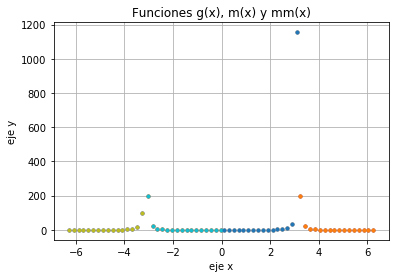

In [20]:
plt.plot(x1, g(x1),'.',x2, g(x2), '.',x3, g(x3),'.',x4,g(x4),'.')
plt.plot(x1, m(x1),'.',x2, m(x2), '.',x3, m(x3),'.',x4,m(x4),'.')
plt.plot(x1, mm(x1),'.',x2, mm(x2), '.',x3, mm(x3),'.',x4,mm(x4),'.')
plt.grid(True)
plt.xlabel('eje x')
plt.ylabel('eje y')
plt.title('Funciones g(x), m(x) y mm(x)')
plt.show()

Lo que se puede apreciar en este grafico es que las 3 funciones, tienen un grafico de la misma forma.

Luego se grafica la diferencia de la funcion g(x) y m(x)

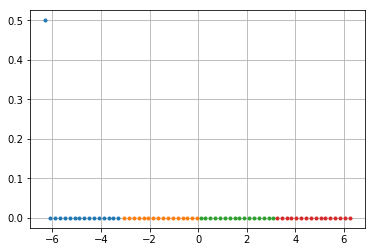

In [22]:
plt.plot(x1, abs(g(x1)-m(x1)),'.',x2, abs(g(x2)-m(x2)), '.',x3, abs(g(x3)-m(x3)),'.',x4,abs(g(x4)-m(x4)),'.')
plt.grid()
plt.show()

La grafica de la diferencia entre la funcion g(x) y mm(x)

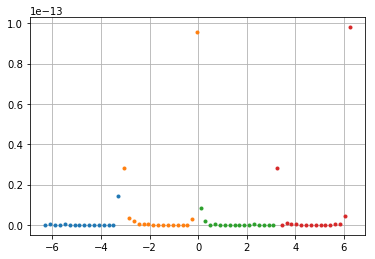

In [23]:
plt.plot(x1, abs(g(x1)-mm(x1)),'.',x2, abs(g(x2)-mm(x2)), '.',x3, abs(g(x3)-mm(x3)),'.',x4,abs(g(x4)-mm(x4)),'.')
plt.grid()
plt.show()

Escribir la función de formas distintas puede afectar bastante en los resultados, sobretodo en indeterminaciones o valores donde el computador deverá aproximar.
Cerca de valores de indeterminación (donde se hace 0) la función tendera a ir a 1.


<div id='con' />
<h2>3. Conclusiones </h2>

Los computadores tienen una memoria limitada, esto genera que los resultados de ecuaciones matematicas no siempre sean los reales, el valor maximo representable en un computador con representación de doble presición es $2^{53}$ y el menor valor representable es $2^{-52}$, estos son los topes para realizar operaciones matematicas sin problema, al sobrepasar estos se generará una perdida de información.
Por lo que es necesario, para realizar cualquier cálculo, tener en cuenta que puede existir perdida de información.

<div id='ref' />
<h2>4. Referencias </h2>

* _http://matplotlib.org_
* _http://www.lawebdelprogramador.com_
* _https://plot.ly_
* _http://docs.sympy.org_
* _http://nbviewer.jupyter.org_